## About
_________

This is a fast fundamental machine learning project in Python for starters.

It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.

After completion, someone will have built intuition over the machine learning lifecycle. 

This work is part of a collection of projects called Machine Learning Starters.


## Step 0: Understand the problem
What we're trying to do here is to predict the price of a diamond given a certain feature of the diamond.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [11]:
# Set-up libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
# Read-in data
df = pd.read_csv('diamonds.csv')

In [14]:
# Look at some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [15]:
# Look at some records
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# Summarise data
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
# Check for missing values
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [18]:
# Check for duplicate values
df.duplicated().sum()

0

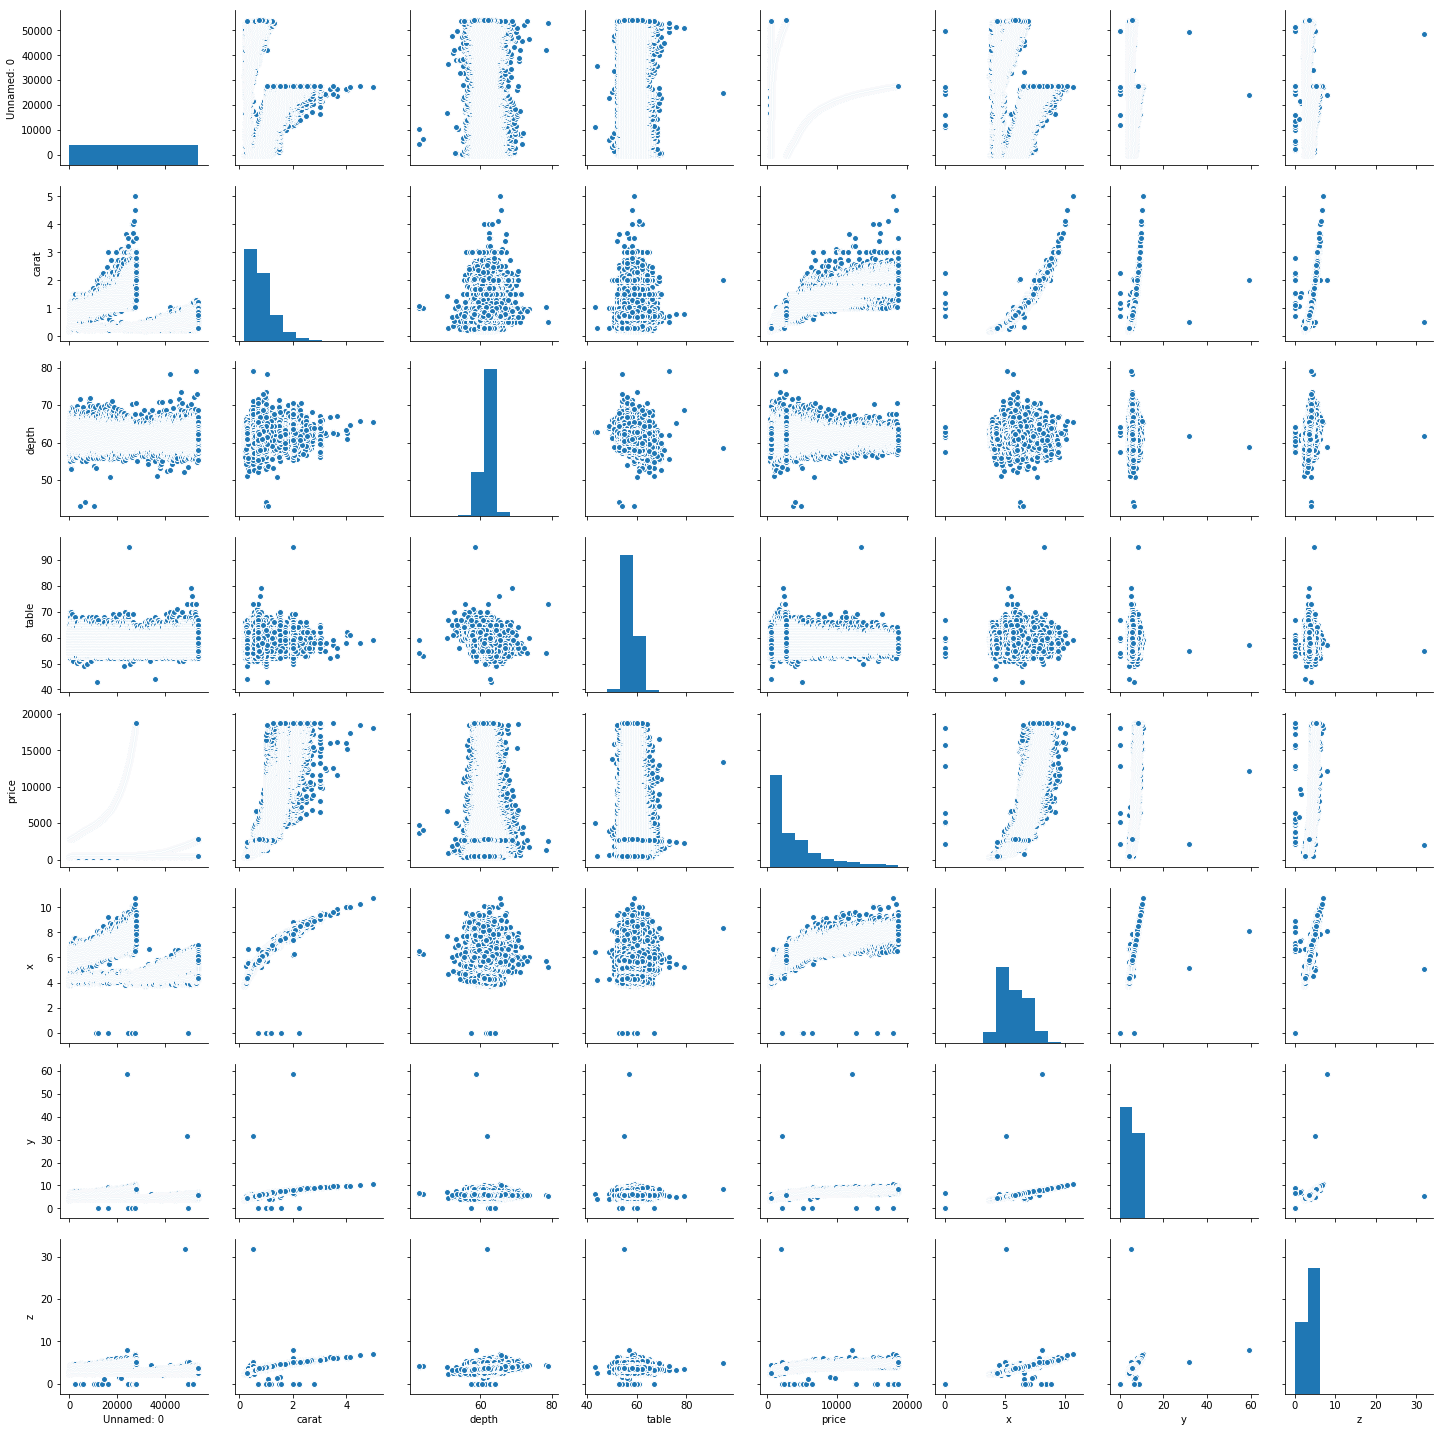

In [19]:
# Explore data visually
sns.pairplot(df)

## Step 2: Preprocess data
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean. 
	
Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [21]:
# Split dataset into 80% train and 20% validation
X = df['carat'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model and evaluate
This last step is three-fold.
	
We create the model and fit the model to the data we prepared for training.
	
We then proceed to making predictions with the data we prepared for validation.
	
Lastly, we evaluate the model's accuracy. For the purposes of this exercise, we stopped at the accuracy metric but there are other metrics we can use to evaluate the model such as Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Median Absolute Error, R2, and so on.

In [22]:
# Build model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Apply model to validation data
y_predict = model.predict(X_val)

actual_vs_predict = pd.DataFrame({'Actual': y_val.flatten(), 'Prediction':y_predict.flatten()})
actual_vs_predict.sample(12)

,Actual,Prediction
4033,1343,2088.883629
6119,3792,5574.249091
5211,1021,307.474615
1684,1133,1624.168234
8234,5458,4799.723432
8608,1040,1004.547707
9798,4844,5496.796525
302,7528,5496.796525
5249,10239,9524.329948
2096,802,152.569483


In [24]:
# Evaluate model
print('Accuracy: %.2f' % (model.score(X_val, y_val)*100), '%' )

Accuracy: 85.16 %


## More

If you found this work interesting, you might like the following. You can find them at github.com/jamiemorales.

* Machine Learning Starters

* Deep Learning Starters

* Natural Language Processing Starters

## References

Data source: https://www.kaggle.com/shivam2503/diamonds